# Unemployement Analysis with python
importing necessery librares

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/home/job/Downloads/Oasis data/Unemployment in India.csv')

### Displaying the data

In [2]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


### Displaying the columns available in the given data

In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

### Checking the presence of null values

In [5]:
df.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True


## Total number of null values present in each column

In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

### Replaceing null values as 0

In [13]:
df.fillna(0, inplace=True)
df.fillna(df.mean(), inplace=True)

/tmp/ipykernel_5687/345828503.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [14]:
df.isnull().sum()

State         0
 Date         0
 Frequency    0
EUR           0
EE            0
ELPR          0
Region        0
dtype: int64

### Again checking the presence of any null values in the data

In [15]:
df.isnull()

,State,Date,Frequency,EUR,EE,ELPR,Region
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False


### Total counts in Urban as well as Rural area

In [16]:
df['Region'].value_counts()

Urban    381
Rural    359
0         28
Name: Region, dtype: int64

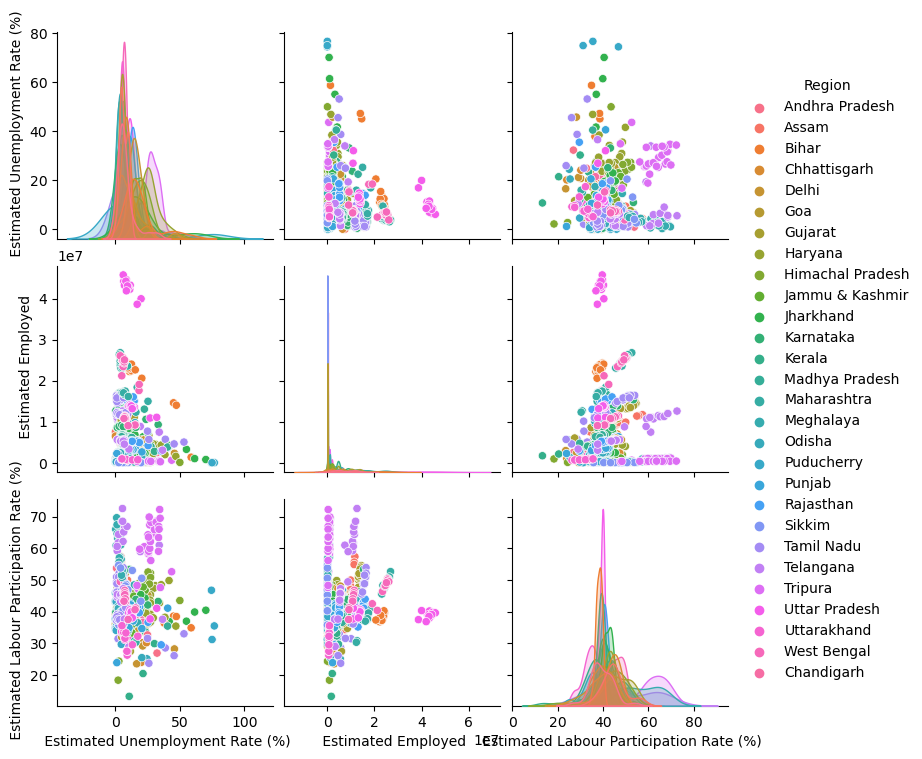

In [9]:
sns.pairplot(df,hue = 'Region')
plt.show()

### Variation of Unemployement Rate(according to month column)

In [10]:
import plotly.express as px

for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
    fg = px.bar(df,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',
                title='Unemployment rate',animation_frame=' Date',template= template
               )
fg.update_layout(xaxis={'categoryorder':'total ascending'})
fg.show()

### Changing column names

In [11]:
df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'EUR',df.columns[4]:'EE', df.columns[5]:'ELPR', df.columns[6]:'Region'})
df.head()

,State,Date,Frequency,EUR,EE,ELPR,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### Overall Unemployement Rate IN(Rural and Urban)

In [12]:
region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()